# Mathplotlib and Seaborn
## Data Analysis and Visualization

These assignments are related to visualization with **MathPlotLib** and **Seaborn** libraries.

In [1]:
student_name = 'Juha-Matti Hellsten'
student_id = 'AG7990'

## Visualizing Weather Data

Visualize weather data loaded from the [Finnish Meteorological Institute's WFS interface](https://en.ilmatieteenlaitos.fi/download-observations) using a `DataFrame`. Before plotting the data, you need to process it as follows:
* Load the data into a `DataFrame` from the file `'data/saatiedot.csv'`, considering that ',' is the column separator and '.' is the decimal separator.
* The first column (or index) of the data contains the time in the format **year-month-day hours:minutes:seconds**.
* Create a new `DataFrame` column `'time, s'` indicating the amount of time in seconds from the first measurement onwards.
* Add a new column `'Air temperature, degC'` to the `DataFrame`.
* Print the first five rows of your processed `DataFrame`.

After processing the data, create an x-y plot as follows:
* Use the column `'time, s'` on the horizontal axis and the column `'Air temperature, degC'` on the vertical axis.
* Mark data points with red dots.
* Provide a legend for the red dots, labeled as `'Air temperature'`.
* Use `'time, s'` for the x-axis title and `'Air temperature $^{o}C$'` for the y-axis title.
* Use [TeX syntax](https://en.wikipedia.org/wiki/TeX) to denote the physical unit in the y-axis title.
* Add a grid with a _black dashed line_.

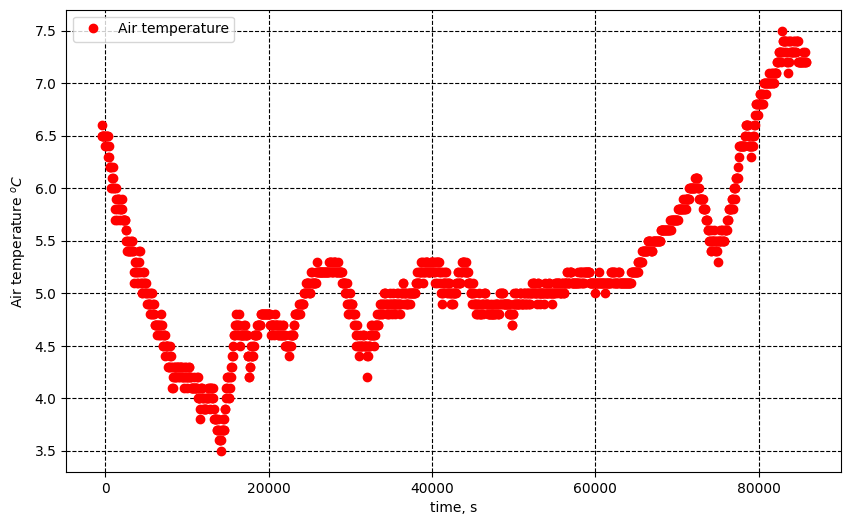

In [2]:
# TODO: Implementation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

df = pd.read_csv(r"C:\Users\jmhel\OneDrive\Työpöytä\JAMK\DA & Visualization\saatiedot.csv", sep=',', decimal='.')

first_time = pd.to_datetime(df.iloc[0, 0])
df['time, s'] = (pd.to_datetime(df.iloc[:, 0]) - first_time).dt.total_seconds()

df['Air temperature, degC'] = df.iloc[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(df['time, s'], df['Air temperature, degC'], 'ro', label='Air temperature')
plt.xlabel('time, s')
plt.ylabel('Air temperature $^{o}C$')
plt.grid(True, linestyle='--', color='black')
plt.legend()
plt.show()

## Premier League Standings

Visualize selected Premier League football teams' home and away wins in the same bar chart. Before plotting the data, you need to process it as follows:
* Load the data into a `DataFrame` from the given url address (`"data/england-premier-league-teams-2018-to-2019-stats.csv"`).
* Add new columns `common_name`, `wins_home` (home wins), and `wins_away` (away wins) to the DataFrame.
* Select the following teams from the DataFrame (`common_name` column): `'Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool', 'Everton'`
* Shorten the team names for the chart by creating a new column `short_name` with the following names: `'Arsenal', 'Tottenham', 'ManCity', 'ManU', 'Chelsea', 'Liverpool', 'Everton'`
* Create a new DataFrame using the `df.melt(id_vars, var_name, value_name ...)` method with new columns `Win Type` and `Wins`
```
   short_name   Win Type  Wins
0     Arsenal  wins_home    14
::::::::::::::::::::::::::::::
7     Arsenal  wins_away     7
```

* After processing the data, create a bar chart on an (x, y)-plane, where the x-axis shows the team's shortened name and the y-axis shows both home wins (`wins_home`) and away wins (`wins_away`).
* Provide a legend for the bars (hint: `Legend`).
* Rotate the x-axis titles by 30 degrees (hint: `xticks`).
* Set a title for the chart.

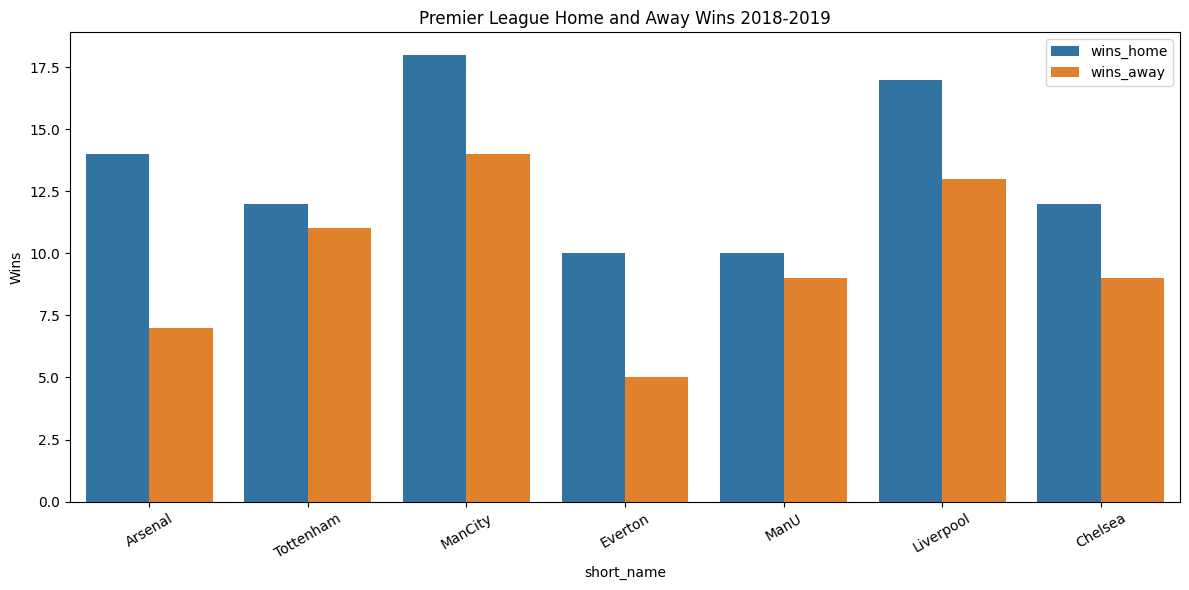

In [3]:
# TODO: Implementation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\jmhel\OneDrive\Työpöytä\JAMK\DA & Visualization\england-premier-league-teams-2018-to-2019-stats.csv")

selected_teams = ['Arsenal', 'Tottenham Hotspur', 'Manchester City', 
                  'Manchester United', 'Chelsea', 'Liverpool', 'Everton']
df = df[df['common_name'].isin(selected_teams)]

short_names = {
    'Arsenal': 'Arsenal',
    'Tottenham Hotspur': 'Tottenham',
    'Manchester City': 'ManCity',
    'Manchester United': 'ManU',
    'Chelsea': 'Chelsea',
    'Liverpool': 'Liverpool',
    'Everton': 'Everton'
}
df['short_name'] = df['common_name'].map(short_names)

melted_df = df.melt(id_vars=['short_name'], 
                    value_vars=['wins_home', 'wins_away'],
                    var_name='Win Type', 
                    value_name='Wins')

plt.figure(figsize=(12, 6))
sns.barplot(x='short_name', y='Wins', hue='Win Type', data=melted_df)
plt.title('Premier League Home and Away Wins 2018-2019')
plt.xticks(rotation=30)
plt.legend(title='')
plt.tight_layout()
plt.show()

## Premier League Standings

Visualize Premier League football data for selected teams, showing both home and away wins in the same bar chart. Before plotting the data, process it as follows:
* Load the data into a `DataFrame` from the file `"data/england-premier-league-teams-2018-to-2019-stats.csv"`.
* Add columns `team_name, common_name, season, wins, draws`, and `losses` to the `DataFrame`.
* Select the following teams (`common_name`): `'Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool', 'Everton'`
* Shorten the team names for the chart by creating a new column `short_name` with the following names: `'Arsenal', 'Tottenham', 'ManCity', 'ManU', 'Chelsea', 'Liverpool', 'Everton'`
* Add a completely new column `points` to the `DataFrame` using the formula: `wins * 3 + draws` (0 points for losses).

After processing the data, create a bar chart on a transposed (x, y)-plane, where the y-axis shows the shortened team name, and the x-axis shows the points collected by the team.
* Try to rotate the y-axis titles by _30_ degrees (hint: `plt.yticks`).
* Add dynamically a title for the y-axis, including information about the season (`season`) and the number of matches played (`matches_played`) from the original `DataFrame`.
* Add a grid to the chart (hint: `grid`).

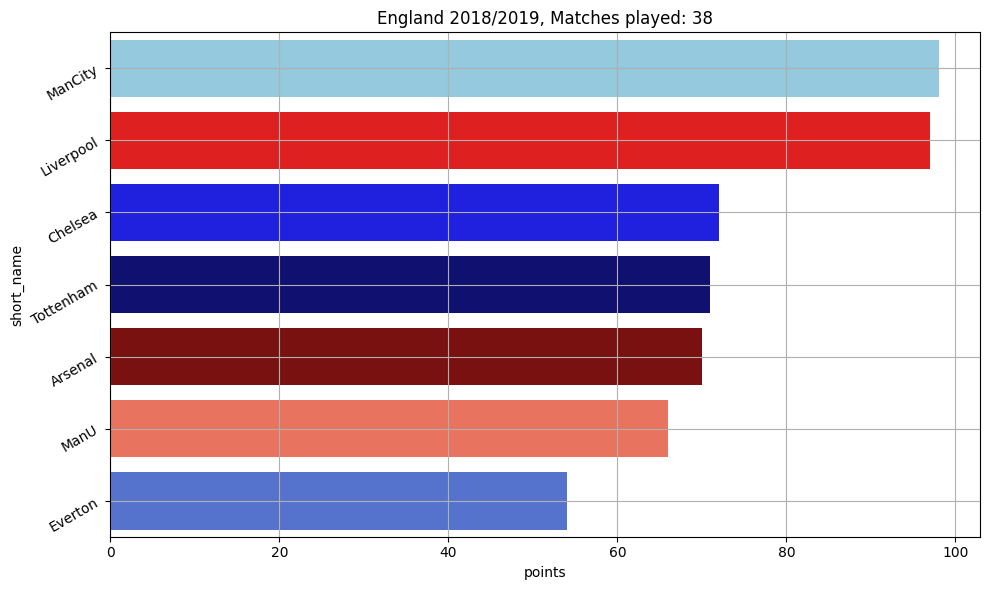

In [4]:
# TODO: Implementation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\jmhel\OneDrive\Työpöytä\JAMK\DA & Visualization\england-premier-league-teams-2018-to-2019-stats.csv")

selected_teams = ['Arsenal', 'Tottenham Hotspur', 'Manchester City', 
                  'Manchester United', 'Chelsea', 'Liverpool', 'Everton']

df = df[df['common_name'].isin(selected_teams)].copy()

short_names = {
    'Arsenal': 'Arsenal',
    'Tottenham Hotspur': 'Tottenham',
    'Manchester City': 'ManCity',
    'Manchester United': 'ManU',
    'Chelsea': 'Chelsea',
    'Liverpool': 'Liverpool',
    'Everton': 'Everton'
}

df['short_name'] = df['common_name'].map(short_names)
df['points'] = df['wins'] * 3 + df['draws']

df_sorted = df.sort_values(by='points', ascending=False)


plt.figure(figsize=(10, 6))
custom_palette = ['skyblue', 'red', 'blue', 'navy', 'darkred', 'tomato', 'royalblue']
ax = sns.barplot(x='points', y='short_name', hue='short_name', data=df_sorted, 
                orient='h', palette=custom_palette, legend=False)

plt.yticks(rotation=30)
plt.title(f'England {df_sorted.iloc[0]["season"]}, Matches played: {df_sorted.iloc[0]["matches_played"]}')
plt.grid(True)
plt.tight_layout()
plt.show()

## Visualizing Car Data

Load the data into a `DataFrame` from the file: `data/autot.csv`.
Save only those rows in a new `DataFrame` where the car manufacturer (column `Mh`) has more than 50 cars. In the new `DataFrame`, replace the string `'DIESEL'` in column `Ft` with `'Diesel'` and `'PETROL'` with `'Petrol'`. If the string `'NG'` appears in column `Ft`, replace it with `'Natural gas'`.

The result of the visualization is an image similar to the one below, where you utilize the columns of your `DataFrame` for the car fuel type `Ft` and the car manufacturer `Mh`.

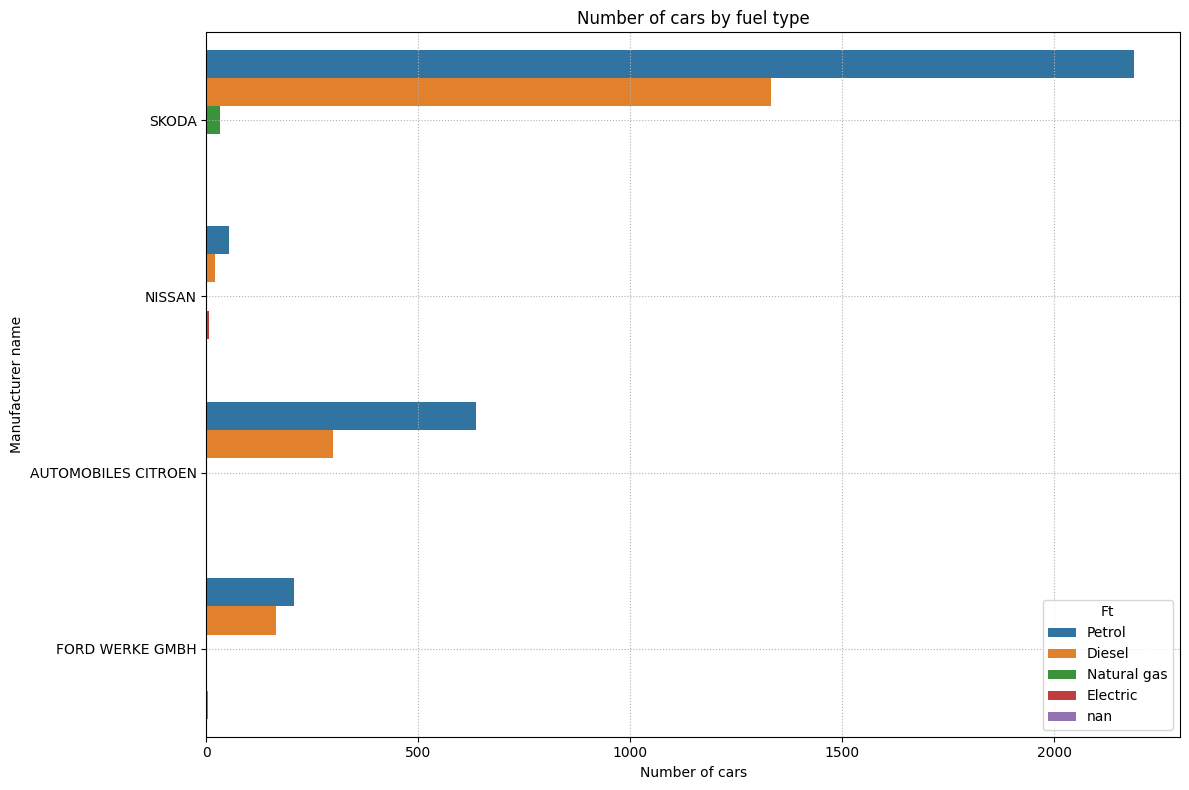

In [5]:
# TODO: Implementation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\jmhel\OneDrive\Työpöytä\JAMK\DA & Visualization\autot.csv", sep='\t')

manufacturer_counts = df['Mh'].value_counts()
manufacturers_over_50 = manufacturer_counts[manufacturer_counts > 50].index

df_filtered = df[df['Mh'].isin(manufacturers_over_50)].copy()
df_filtered.loc[:, 'Ft'] = df_filtered['Ft'].replace({
    'DIESEL': 'Diesel',
    'PETROL': 'Petrol'
})

df_filtered.loc[:, 'Ft'] = df_filtered['Ft'].astype(str)
df_filtered.loc[:, 'Ft'] = df_filtered['Ft'].str.replace('NG', 'Natural gas', regex=False)

plt.figure(figsize=(12, 8))
sns.countplot(data=df_filtered, y='Mh', hue='Ft', orient='h')
plt.grid(True, linestyle=':', axis='both')
plt.xlabel('Number of cars')
plt.ylabel('Manufacturer name')
plt.title('Number of cars by fuel type')
plt.tight_layout()
plt.show()

## Visualizing Car Data Part 2

Load the same data as in previous assignment into a `DataFrame` from the file: `data/autot.csv`

The result of the visualization is a _histogram_ similar to the one below, showing the distribution of $CO_2$ emissions (column `Enedc (g/km)`) in 100 different bins and a *cumulative histogram* of $CO_2$ emissions

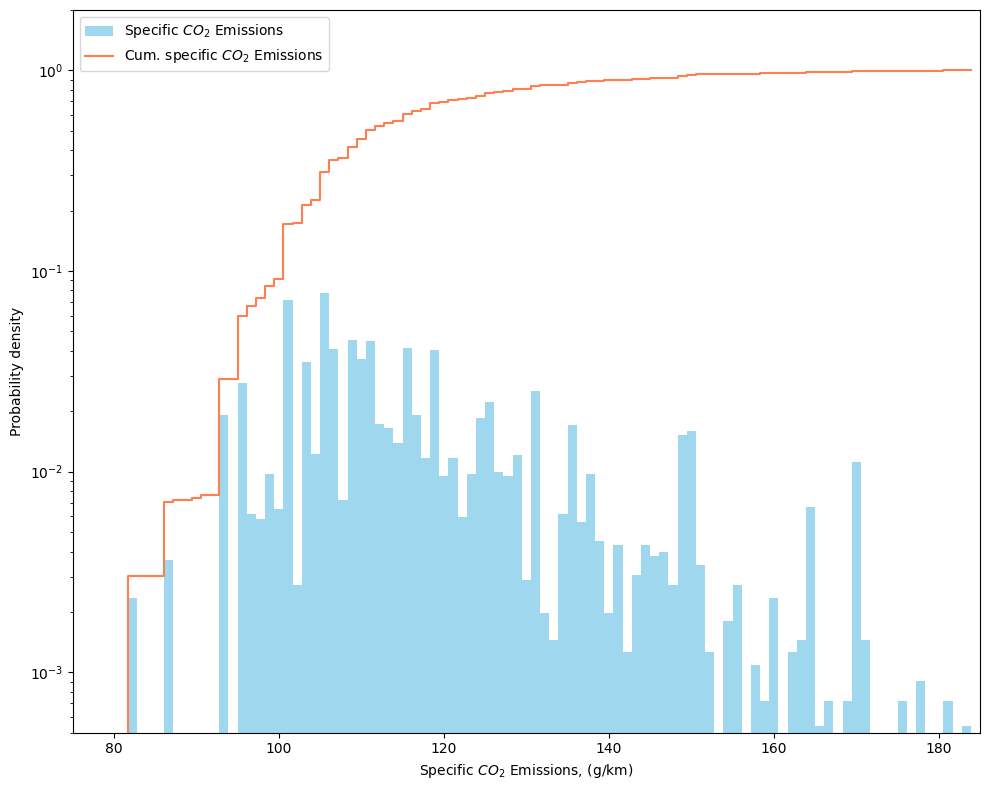

In [6]:
# TODO: Implementation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r"C:\Users\jmhel\OneDrive\Työpöytä\JAMK\DA & Visualization\autot.csv", sep='\t')
co2_data = df['Enedc (g/km)'].dropna()

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_yscale('log')

bins = np.linspace(75, 185, 100)

ax.hist(co2_data, bins=bins, color='skyblue', alpha=0.8, 
        density=True, label='Specific $CO_2$ Emissions')

counts, edges = np.histogram(co2_data, bins=bins)
cdf = np.cumsum(counts) / counts.sum()
ax.step(edges[:-1], cdf, color='coral', where='post',
       label='Cum. specific $CO_2$ Emissions')

ax.set_xlim(75, 185)
ax.set_ylim(5e-4, 2)
ax.set_xlabel('Specific $CO_2$ Emissions, (g/km)')
ax.set_ylabel('Probability density')

ax.legend()
plt.tight_layout()
plt.show()